In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
#lets load the data set, which saved in jupyter notebook as medical_cost_insurance.csv

df = pd.read_csv('medical_cost_insurance.csv')

In [5]:
#Select the top 5 rows

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Lets find the total number of rows and Columns

print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 1338   Number of columns: 7


In [9]:
# Detail of columns
df.info()


#Floadt,int,object different data types are available in table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Stats of the table

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Lets check is there any duplicate are present in table

df.duplicated().sum()


1

In [11]:
#lets delete the duplicate values

df.drop_duplicates(inplace=True)

In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: xlabel='charges', ylabel='Density'>

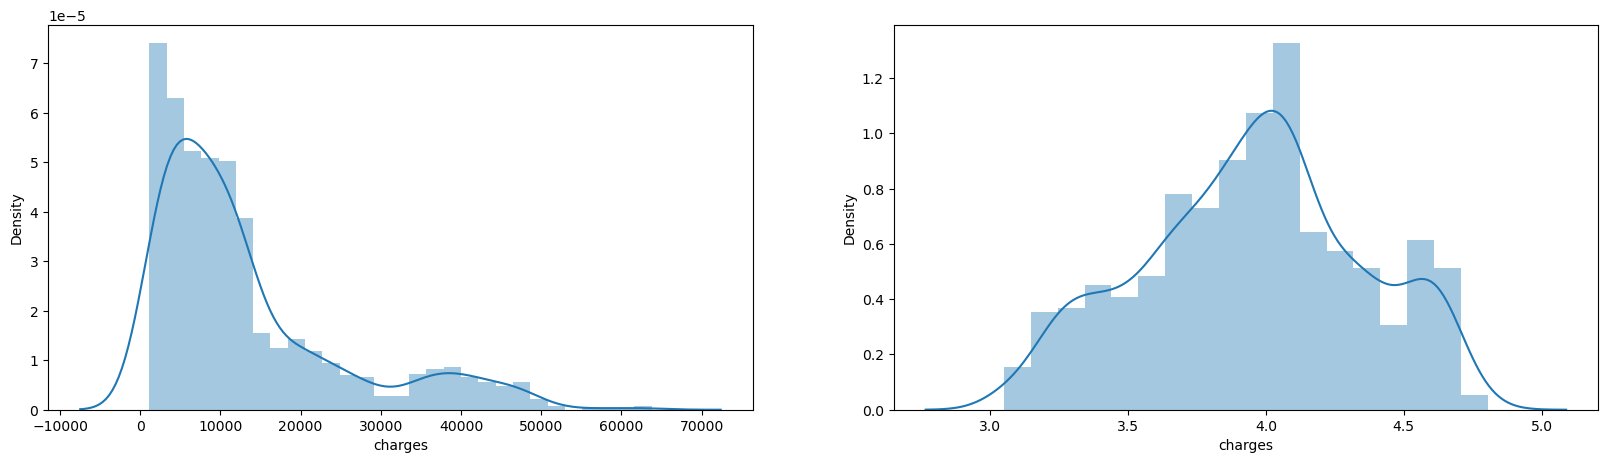

In [15]:
#Lets check the Visualization of DATA
#Distribution of Charges

# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges)

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges))

Text(0.5, 1.0, 'Distribution of BMI')

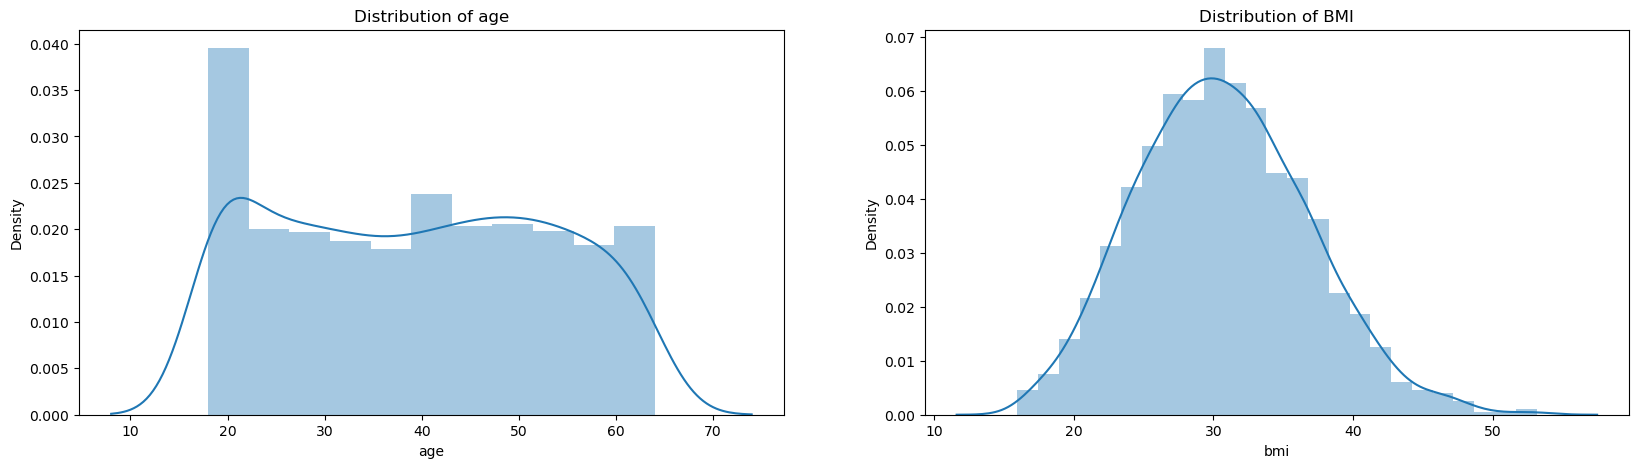

In [16]:
#Distibution of Varibales and Medical chrages

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.age).set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi).set_title('Distribution of BMI')

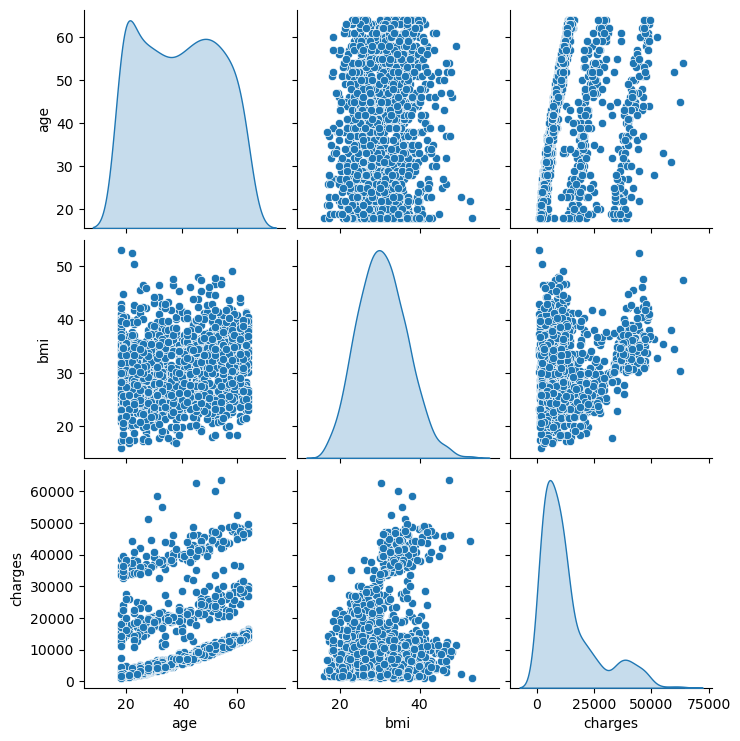

In [17]:
#For the rest

# Pairplot for Age, BMI, Charges
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

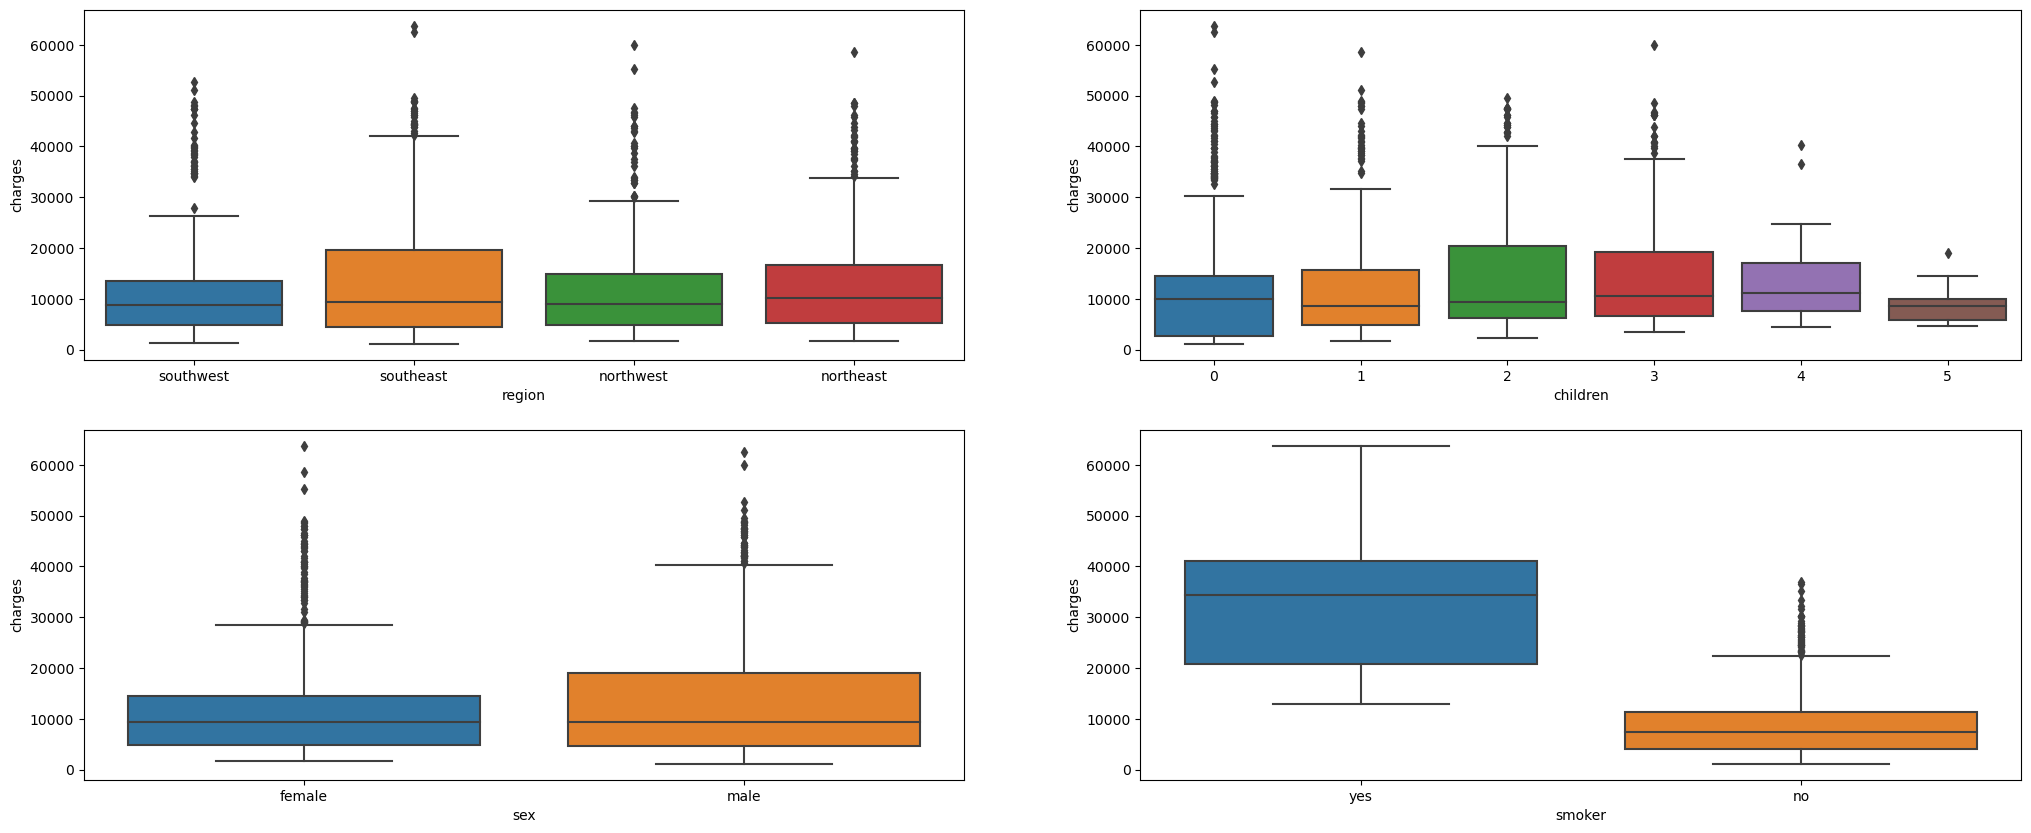

In [18]:
#categorical variables individually vs medical charges

plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

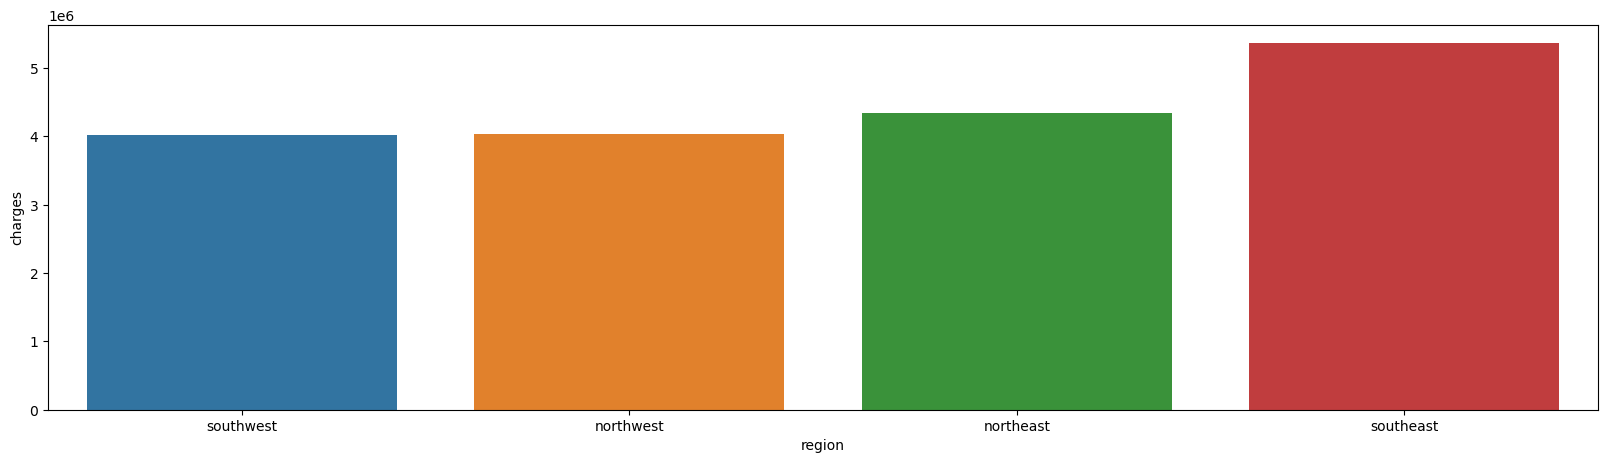

In [19]:
#Lets do the Bi Variate Analysis

#Charges by region

charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

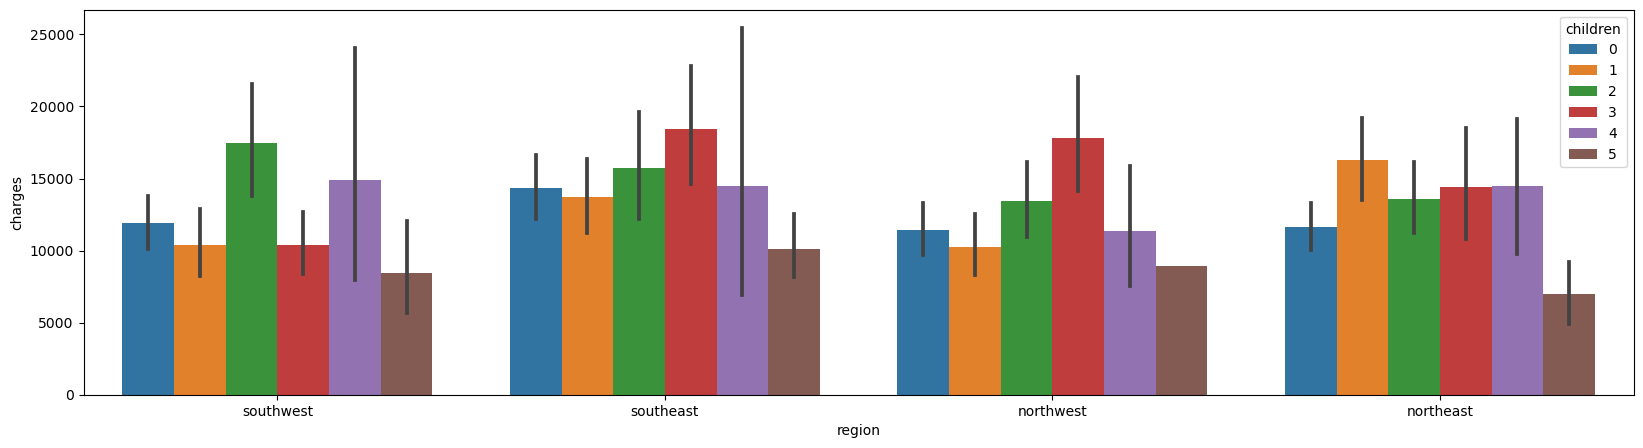

In [20]:
#Charges by region and number of children

# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

<Axes: xlabel='region', ylabel='charges'>

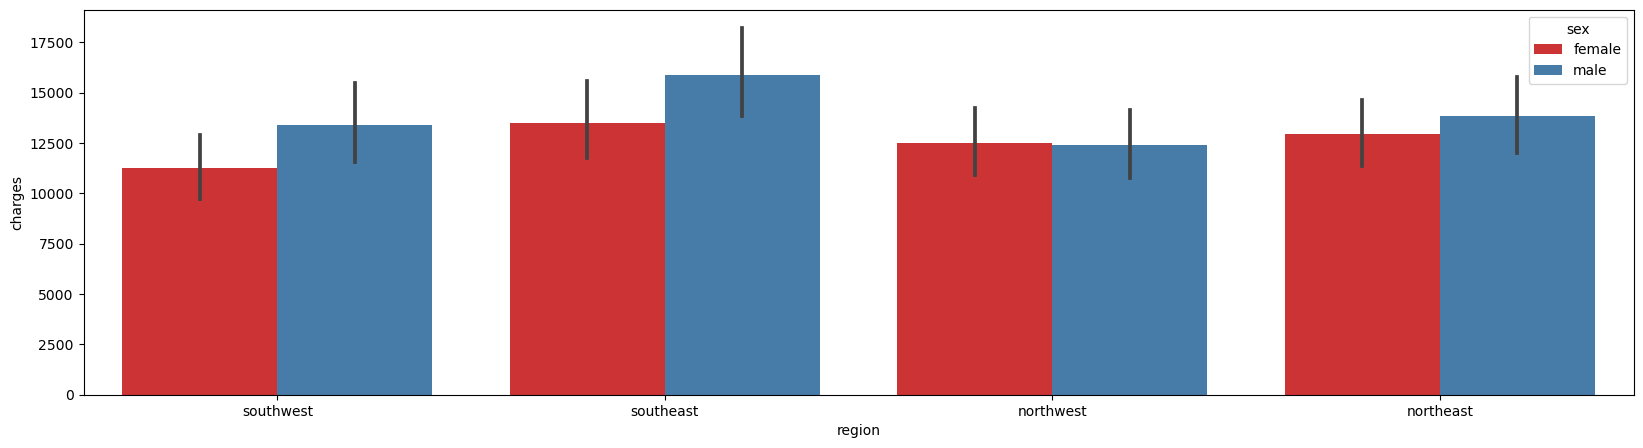

In [21]:
#Charges by region and gender

# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

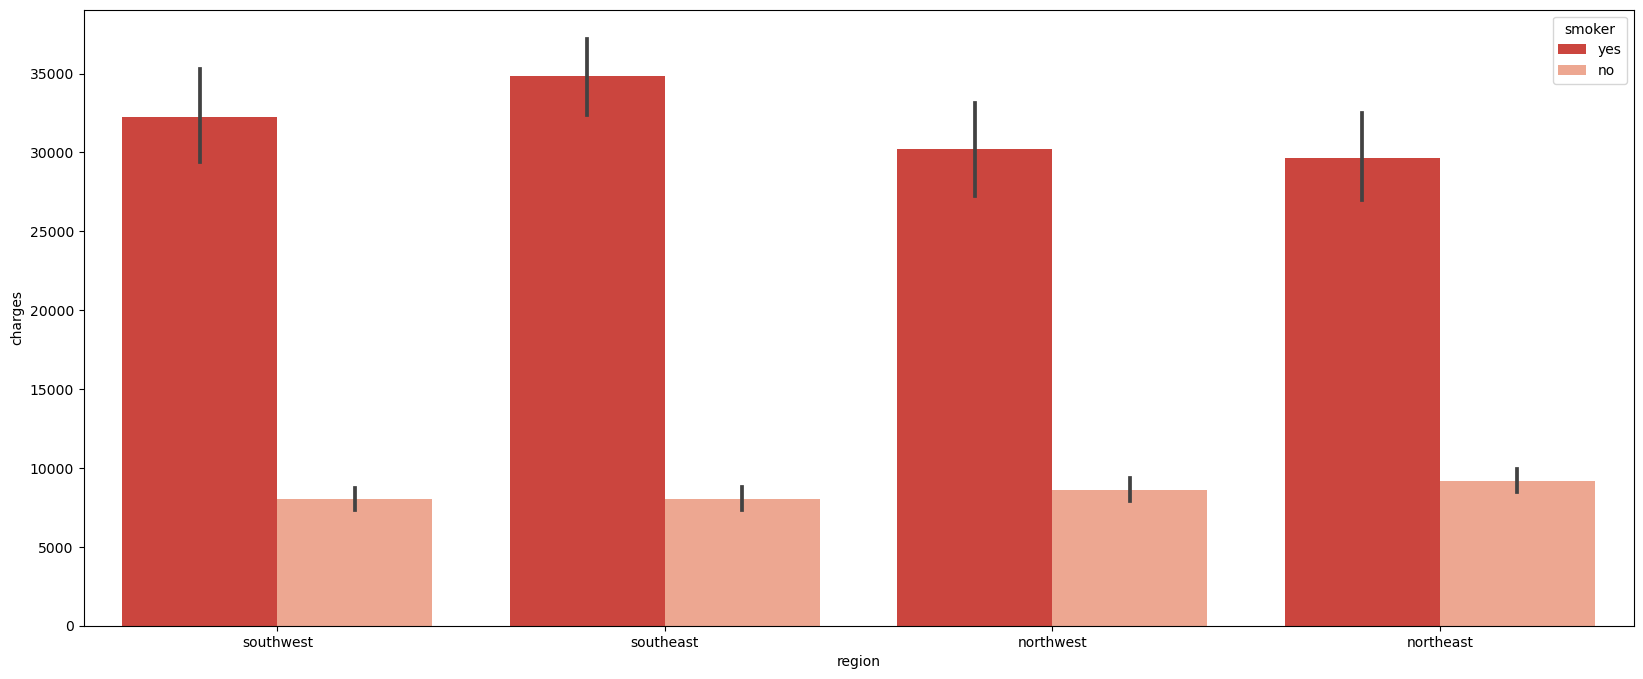

In [22]:
#Charges by region and smoking behavior

f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')

Text(0.5, 1.0, 'Number of children vs Medical Charges')

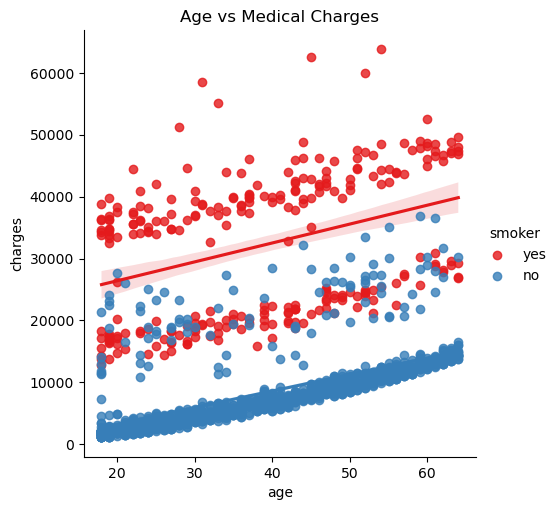

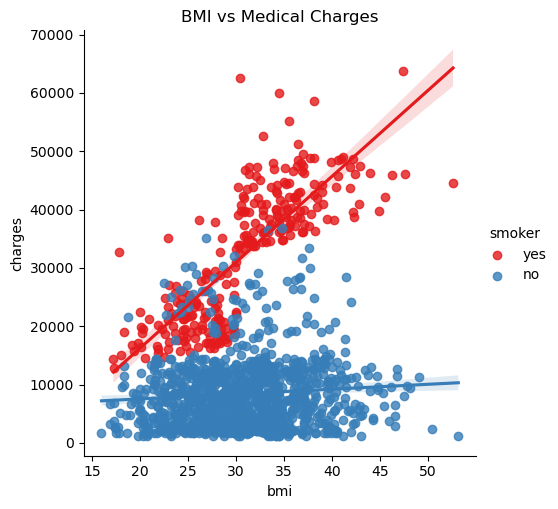

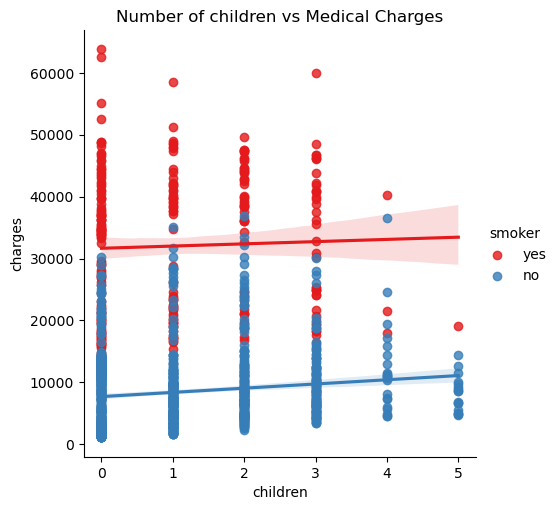

In [23]:
#Charges by age, bmi, and children based on smoking behavior


ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

#Data Correlation
To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap.

In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.

In [25]:
# Converting data to categorical type data
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [27]:
#Encoding

# Converting Data to numerical type using LabelEncoder

label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [28]:
#Selecting the Top 5

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


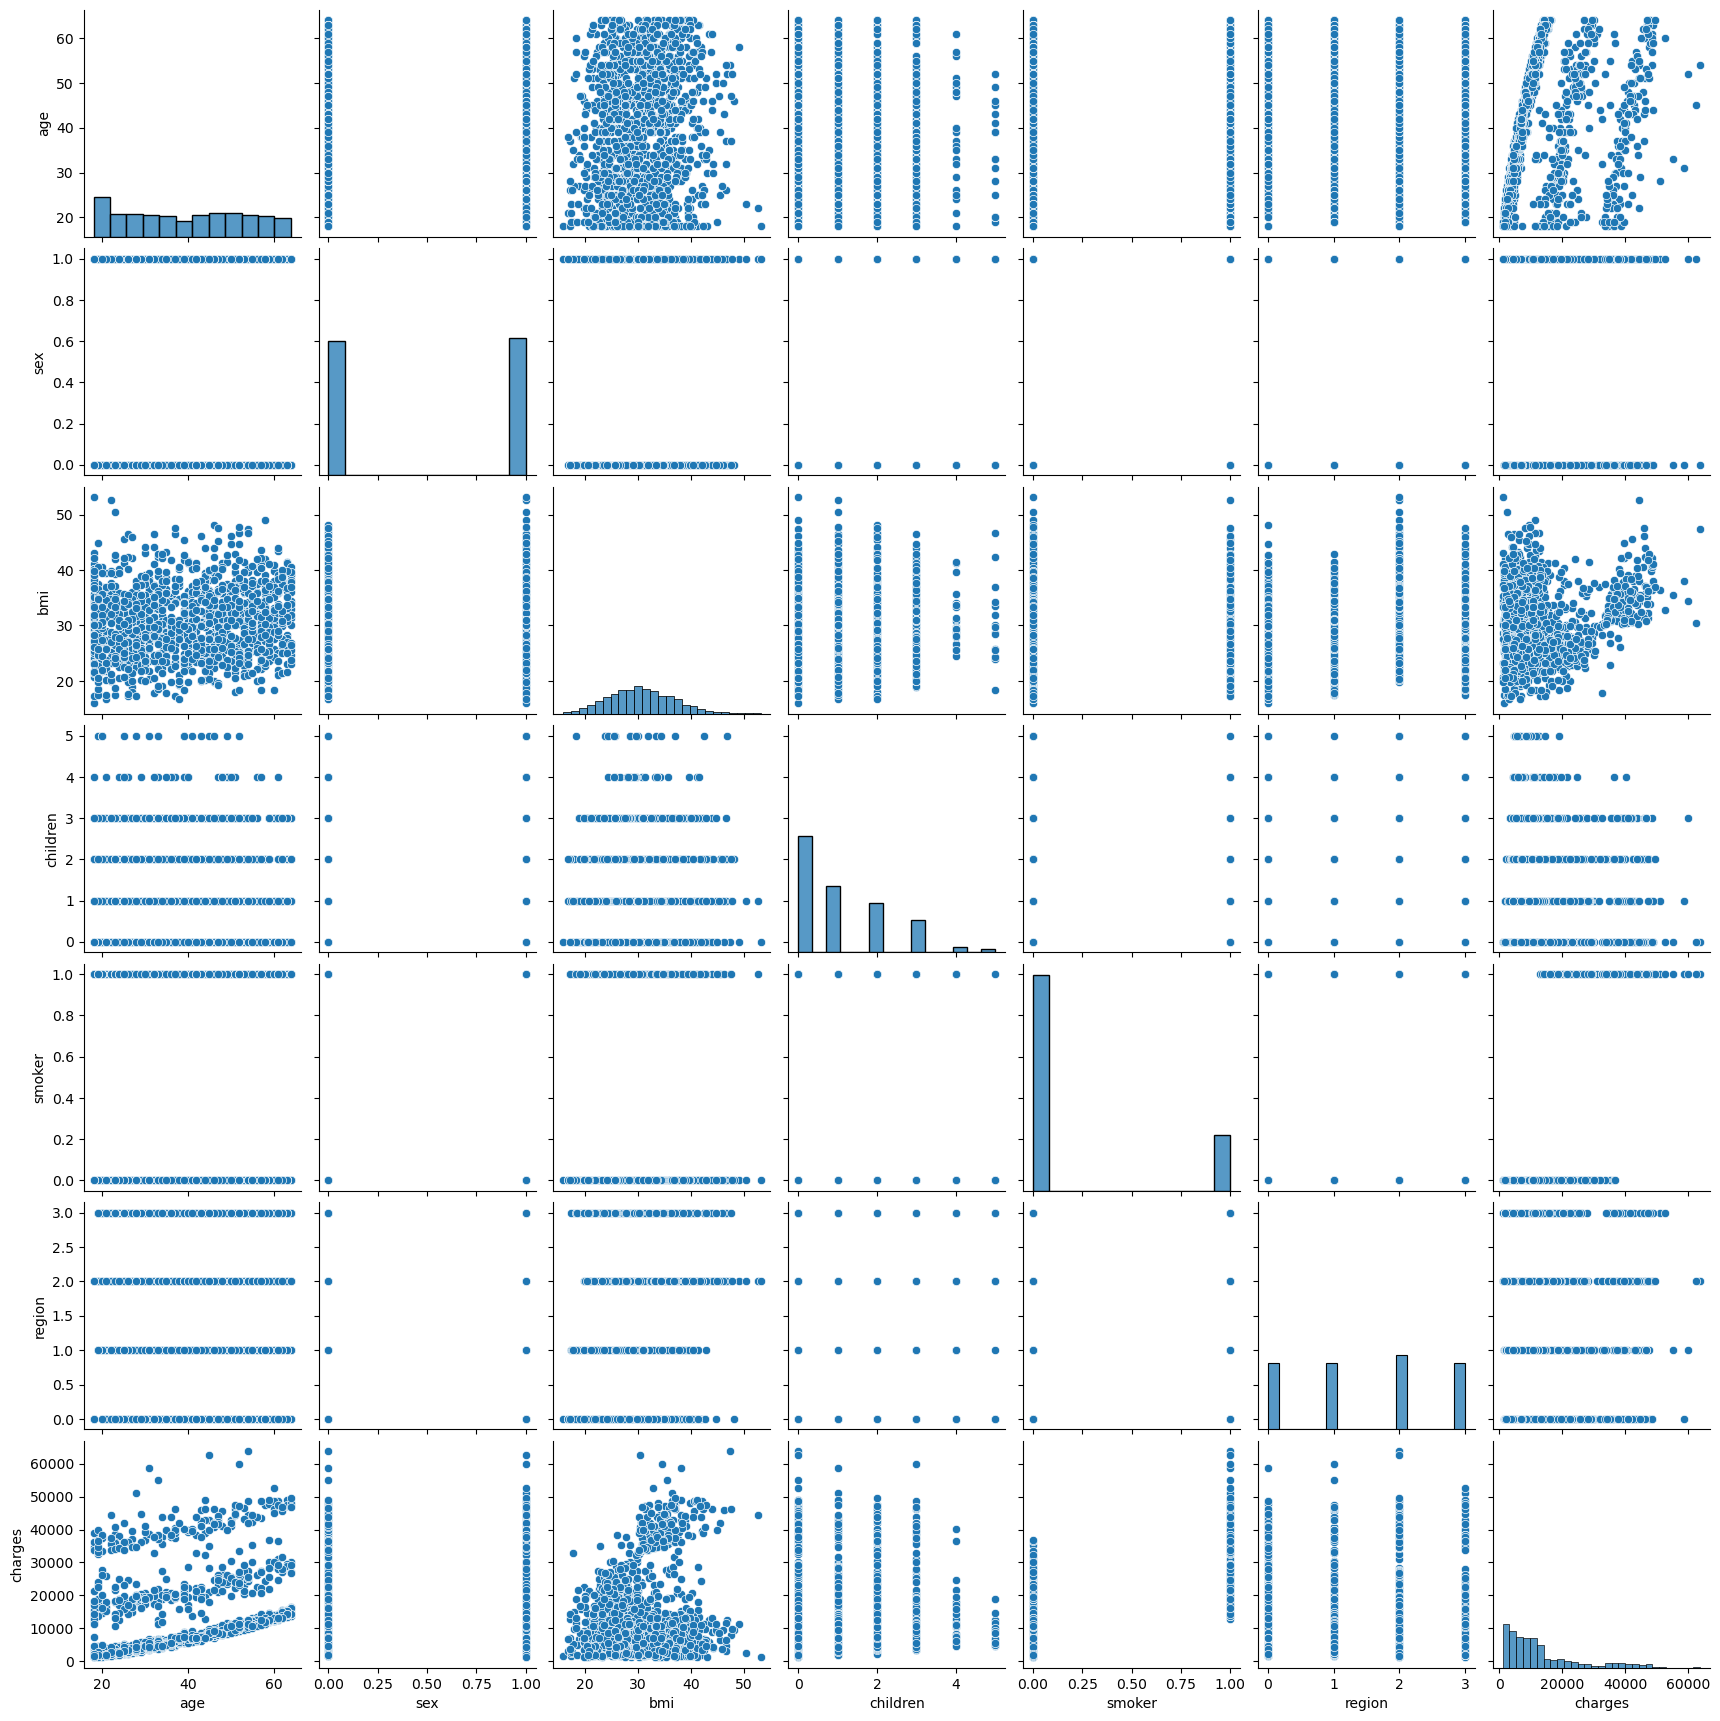

In [29]:
#Sns plot

sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

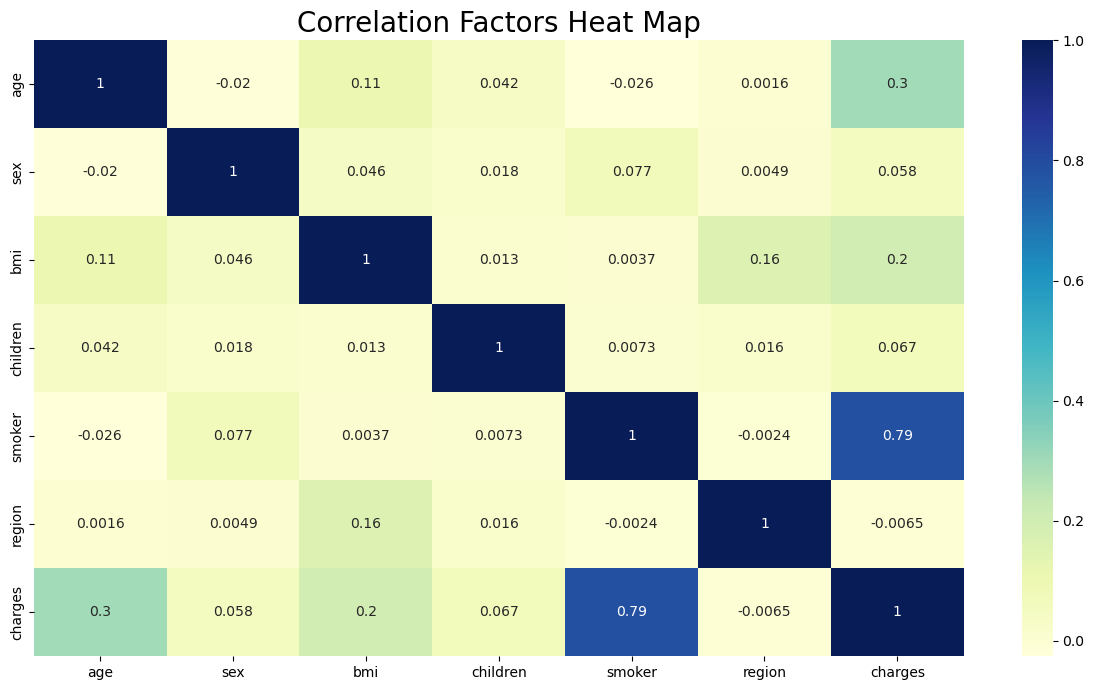

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

In [32]:
#Preparing Data for Machine Learning

X = df.drop('charges', axis = 1)
y = df['charges']

In [33]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)


In [34]:
#Model Building
#Linear Regression


LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7526726290709553
MAE 4400.502490291576


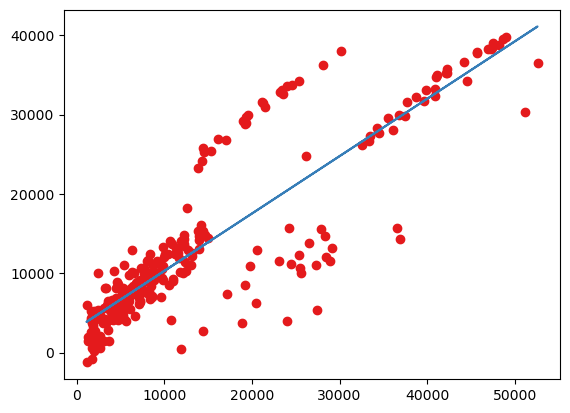

In [35]:
#Best Fit Line

palette = "Set1"
sns.set_palette(palette)
plt.plot(y_test,y_pred,'o')
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)
plt.show()

In [36]:
#Ridge Regression

R = Ridge(alpha=10)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2_score 0.7501295487184223
MAE 4508.8360076185445


In [37]:
#Decision Tree Regression

DT = DecisionTreeRegressor(max_depth=3)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.830552712192923
MAE 3222.1058103515074


In [38]:
#Random Forest Regression

RF = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=15)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8441502558295858
MAE 2852.234054562688


In [39]:
#Lasso Regression

L = Lasso(alpha=0.001)
L.fit(X_train,y_train)
y_pred = L.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7526726303757756
MAE 4400.502800096362


In [40]:
#ADA Boost Regressor

AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8179717436831558
MAE 4086.5732918125195


In [41]:
#Extra Tree Regression

ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15,
                           bootstrap=True)

ET.fit(X_train,y_train)
y_pred = ET.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8448254320064397
MAE 3028.0972342050354


In [43]:
#Gradient Boosting Regressor

GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8482993946881392
MAE 2768.3692921139145


In [49]:
#DataFrame of all the model and MAE

# Define the models
models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,
}

# Create an empty dataframe
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

# Iterate over each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the results to the dataframe
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)



In [50]:
#Lets check the results of All models
results_df

,Model,R2 Score,MAE
0,Linear Regression,0.752673,4400.502490
1,Ridge,0.750130,4508.836008
2,Lasso,0.752673,4400.502800
3,Decision Tree,0.830553,3222.105810
4,Random Forest,0.844150,2852.234055
5,Extra Trees,0.844825,3028.097234
6,AdaBoost,0.833512,4002.767190
7,Gradient Boosting,0.848299,2768.162051


In [52]:
results_df.max()

Model             Ridge
R2 Score       0.848299
MAE         4508.836008
dtype: object

In [55]:
#Best model is "Gradient Boost"

In [56]:
#NOT ABLE TO USE XGBOOST DUE TO some Error Encountered while importing